In [ ]:
## 📦 Importation des bibliothèques
#Dans cette section, nous importons les bibliothèques nécessaires à l’analyse et à la modélisation :

#`pandas` et `numpy` pour la manipulation et l’analyse des données
#`scikit-learn` pour les algorithmes de machine learning : régression logistique, k-plus proches voisins (KNN), et arbre de décision
#`train_test_split` pour diviser le jeu de données
#`time` pour mesurer le temps d'exécution des modèles


import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, decomposition
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time

In [ ]:
## 📥 Chargement du jeu de données
#Le jeu de données utilisé est celui du Titanic, disponible publiquement (ex : sur Kaggle). Il contient des informations sur les passagers, telles que l’âge, le sexe, la classe, le tarif payé ou encore la survie.
#Nous le chargeons dans un DataFrame Pandas pour l’explorer et le manipuler facilement.

Titanic = pd.read_csv('titanic.csv')
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Résumé des colonnes quantitatives
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Résumé des colonnes qualitatives
Titanic.describe(include=np.object_)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


<Axes: >

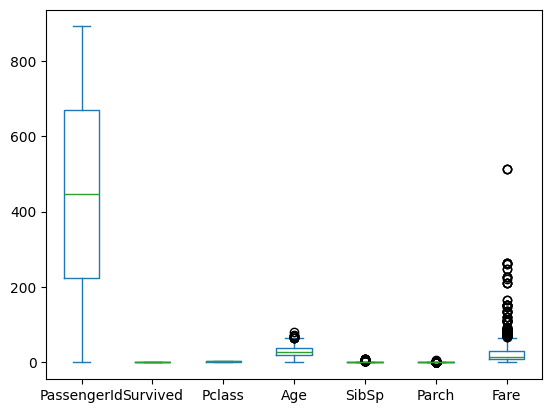

In [ ]:
#Visualisation de la dispersion des variables numériques
Titanic.plot.box()

#on remarque que le boxplot de PassengerId est parfaitement symétrique car: tous les passagers ont un identifiants unique ( de 1 à 891 donc pas de valeurs manquantes ni de dispersion anormale)
#L'age varie, il y a quelques valeurs extrêmes donc cette catégorie doit être traitée
#Fare présente une forte asymétrie, la plupart des passagers ont payé un tarif bas mais on remarque quelques billets très coûteux (surement les premières classe ou les famille)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


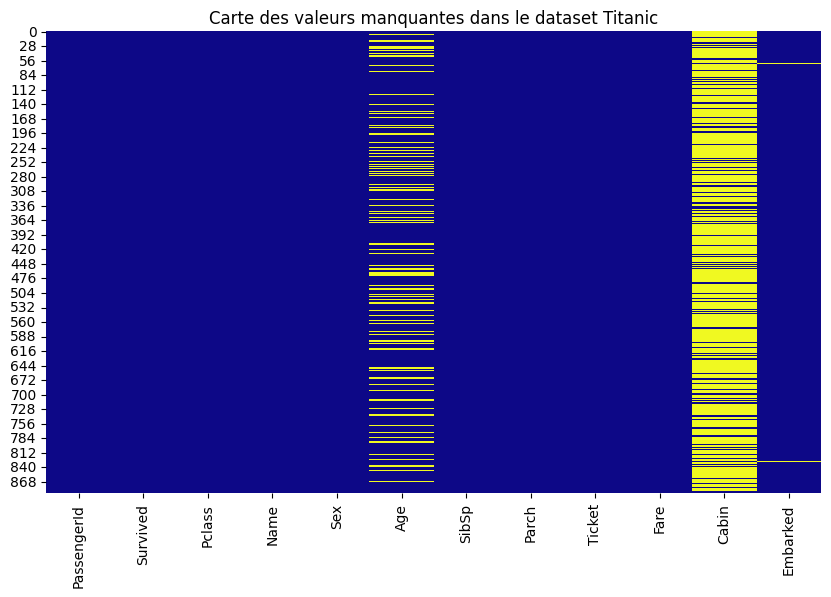

In [38]:
print(Titanic.isnull().sum())
# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Carte de chaleur des valeurs manquantes
sns.heatmap(Titanic.isnull(), cbar=False, cmap='plasma')

# Titre
plt.title("Carte des valeurs manquantes dans le dataset Titanic")
plt.show()

#le boxplot de Age s'explique aussi par le nombre important de valeurs manquantes
#la colonne Cabin est quasiment vide et nous avons peu d'information pour compléter les valeurs manquantes: on va la supprimer

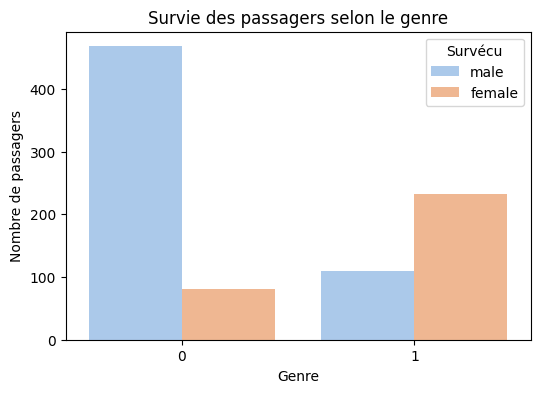

In [ ]:
# Créer un graphique en barres montrant la survie selon le sexe
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=Titanic, palette='pastel')

# Ajouter un titre et des labels
plt.title("Survie des passagers selon le genre")
plt.xlabel("Sex")
plt.ylabel("Nombre de passagers")
plt.legend(title='Survécu', labels=['male', 'female'])

# Afficher le graphique
plt.show()

#on remarque que les hommes ont beaucoup moins survécu que les femmes, peut-être parce que ce sont: "les femmes et les enfants d'abord"


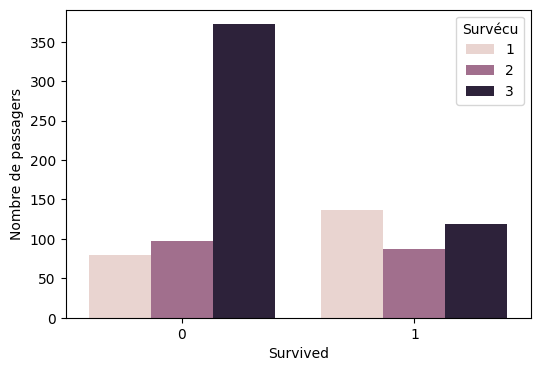

In [ ]:
# Créer un graphique en barres montrant la survie selon la classe
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=Titanic)

# Ajouter un titre et des labels
plt.xlabel("Pclass")
plt.ylabel("Nombre de passagers")
plt.legend(title='Survécu', labels=['1', '2', '3'])

# Afficher le graphique
plt.show()

#les passagers de la 3e classe ont beaucoup moins survécu que ceux des autres classes, çela pourrait s'expliquer par le fait que leurs chambres se situaient plus en bas que les autres, ils auraient eu moins de temps pour se sauver
#on remarque quand même qu'il y a plus de passagers de la 3e classe quit ont survécu que ceux de la 2e

In [39]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#TitanicPropre= Dataset complet avec la variable cible Survived qu'on utiliseras pour entraîner le modèle
#TitanicLaver= Dataset avec uniquement les feautures
#on a transformé les textes en chiffres car les aglorithmes ne savent pas lire du texte
#on a traité les valeurs manquanteset supprimer les features qui ne nous interessaient pas

In [62]:
TitanicPropre=Titanic[['Survived','PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
TitanicLaver=Titanic[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
TitanicLaver,TitanicPropre=TitanicLaver.replace('S',0),TitanicPropre.replace('S',0)
TitanicLaver,TitanicPropre=TitanicLaver.replace('C',1),TitanicPropre.replace('C',1)
TitanicLaver,TitanicPropre=TitanicLaver.replace('Q',2),TitanicPropre.replace('Q',2)
TitanicLaver,TitanicPropre=TitanicLaver.replace('male',1),TitanicPropre.replace('male',1)
TitanicLaver,TitanicPropre=TitanicLaver.replace('female',-1),TitanicPropre.replace('female',-1)
TitanicLaver,TitanicPropre=TitanicLaver.fillna((TitanicLaver['Age']).mean()),TitanicPropre.fillna((TitanicLaver['Age']).mean())
# Créer une fonction pour classer les âges
def classer_age(age):
    if age < 18:
        return 0 #mineur
    elif age < 60:
        return 1 #majeur
    else:
        return 2 #senior

# Appliquer la fonction à la colonne 'Age'
TitanicPropre['GroupeAge'] = TitanicPropre['Age'].apply(classer_age)
TitanicLaver['GroupeAge'] = TitanicLaver['Age'].apply(classer_age)TitanicLaver
TitanicLaver=TitanicLaver.drop(columns=['PassengerId'])


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0.0
1,2,1,-1,38.000000,1,0,71.2833,1.0
2,3,3,-1,26.000000,0,0,7.9250,0.0
3,4,1,-1,35.000000,1,0,53.1000,0.0
4,5,3,1,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0.0
887,888,1,-1,19.000000,0,0,30.0000,0.0
888,889,3,-1,29.699118,1,2,23.4500,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0


In [65]:
X = TitanicLaver
y = TitanicPropre['Survived']

In [66]:
#On garde 20% des données pour tester
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # 5 voisins
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
#on test le modèle sur X_test, il prédit y_pred qu'on compare avec les vriaes valeurs de y_test
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN :", round(accuracy * 100, 2), "%")

Précision du modèle KNN : 67.04 %


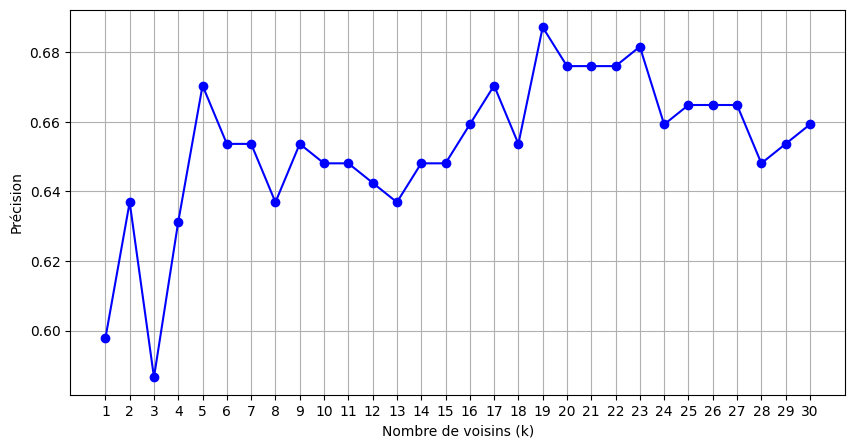

In [88]:
#on teste 30 modèles différents avec k de 1 à 30 et on trace un graphique pour voir le meilleur nombre de voisins
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

scores = []

# Tester k de 1 à 30
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred_k)
    scores.append(score)

# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), scores, marker='o', color='blue')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Précision")
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()


In [81]:
#on utilise le meilleur k
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=19)  # 19 voisins
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [82]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN :", round(accuracy * 100, 2), "%")

Précision du modèle KNN : 68.72 %
